На основі згорткової моделі

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

Epoch 1/10
469/469 [==============================] - 69s 144ms/step - loss: 0.1982 - val_loss: 0.1394
Epoch 2/10
469/469 [==============================] - 72s 153ms/step - loss: 0.1308 - val_loss: 0.1222
Epoch 3/10
469/469 [==============================] - 68s 144ms/step - loss: 0.1193 - val_loss: 0.1149
Epoch 4/10
469/469 [==============================] - 70s 149ms/step - loss: 0.1138 - val_loss: 0.1106
Epoch 5/10
469/469 [==============================] - 69s 147ms/step - loss: 0.1102 - val_loss: 0.1084
Epoch 6/10
469/469 [==============================] - 71s 151ms/step - loss: 0.1077 - val_loss: 0.1055
Epoch 7/10
469/469 [==============================] - 72s 154ms/step - loss: 0.1060 - val_loss: 0.1042
Epoch 8/10
469/469 [==============================] - 71s 152ms/step - loss: 0.1045 - val_loss: 0.1028
Epoch 9/10
469/469 [==============================] - 70s 150ms/step - loss: 0.1033 - val_loss: 0.1016
Epoch 10/10
469/469 [==============================] - 71s 152ms/step - l

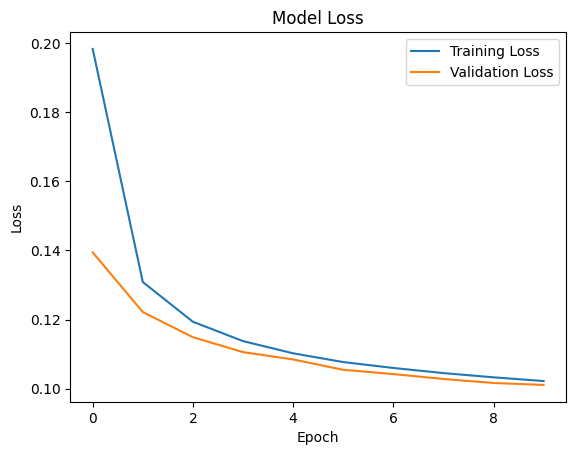

313/313 [==============================] - 4s 12ms/step


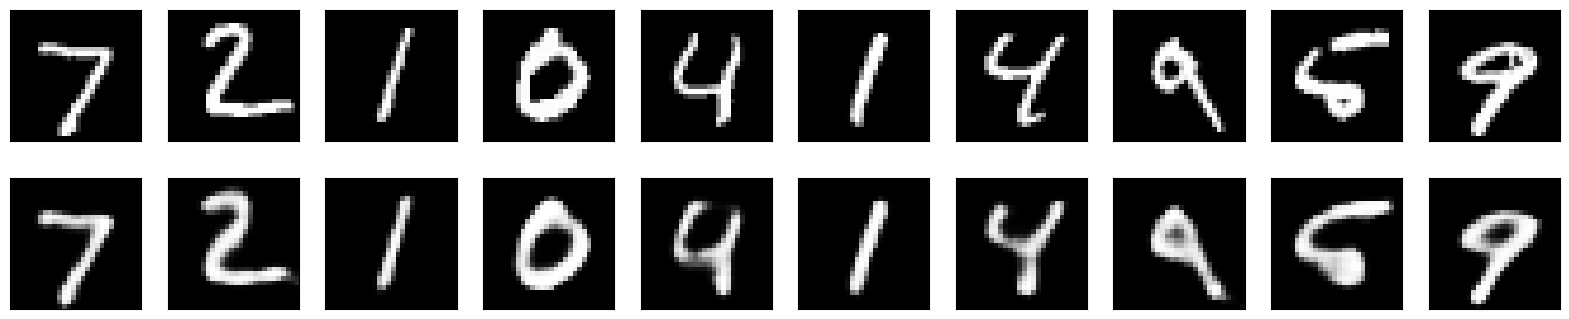

In [13]:
#MNIST
(x_train, _), (x_test, _) = mnist.load_data()

x_train_conv = x_train.reshape(len(x_train), 28, 28, 1) / 255.
x_test_conv = x_test.reshape(len(x_test), 28, 28, 1) / 255.

input_img_conv = Input(shape=(28, 28, 1))

#Кодер
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img_conv)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

#Декодер
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Модель автокодувальника
autoencoder = Model(input_img_conv, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#Навчання та тестування
history_conv = autoencoder.fit(x_train_conv, x_train_conv,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_conv, x_test_conv))

# Графік функції втрат
plt.plot(history_conv.history['loss'], label='Training Loss')
plt.plot(history_conv.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Результати розпізнавання
decoded_imgs = autoencoder.predict(x_test_conv)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Оригінальні зображення
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_conv[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Відновлені зображення
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()